In [1]:
import pandas as pd

# the file is a CSV, use read_csv instead of read_excel
df = pd.read_csv("../dataset/IMDB_Dataset.csv", encoding='latin-1')
df.columns = ["review", "label"]
df.head()
df.info()
df.describe()

df.isnull().sum()
df["label"].value_counts()
# Encode the labels: positive -> 1, negative -> 0
df["label"] = df["label"].map({"positive": 1, "negative":0})
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  50000 non-null  object
 1   label   50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


,review,label
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


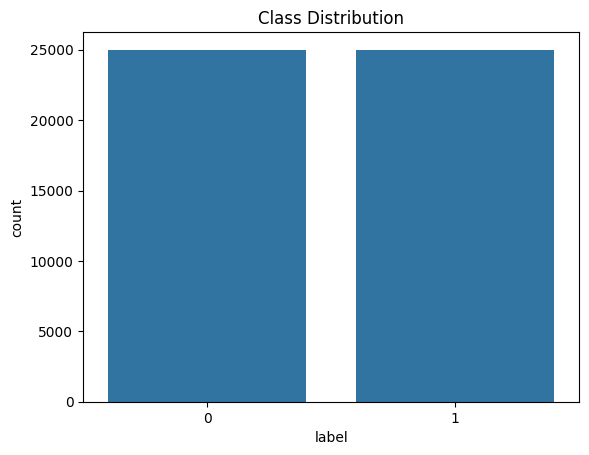

label
1    25000
0    25000
Name: count, dtype: int64


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="label", data=df)
plt.title("Class Distribution")
plt.savefig("../saved_model/class_distribution.png", dpi=100, bbox_inches='tight')
plt.show()

print(df["label"].value_counts())

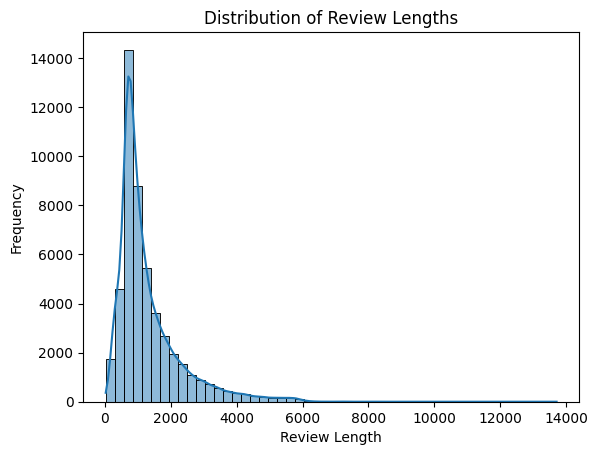

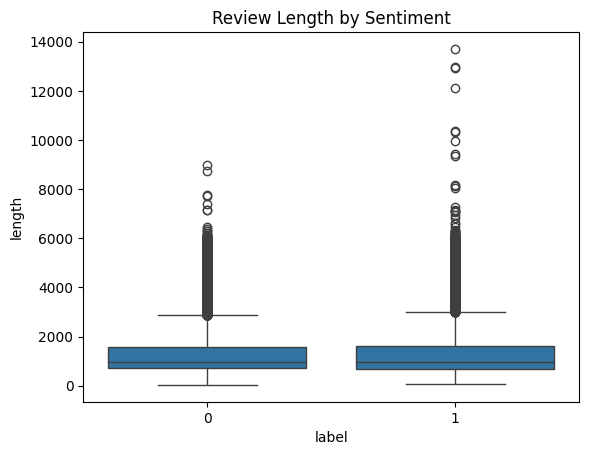

In [3]:
# Create review length feature:
df["length"] = df["review"].apply(len)
sns.histplot(df["length"], bins=50, kde=True)
plt.title("Distribution of Review Lengths")
plt.xlabel("Review Length")
plt.ylabel("Frequency")
plt.savefig("../saved_model/review_length_distribution.png", dpi=100, bbox_inches='tight')
plt.show()

sns.boxplot(x="label", y="length", data=df)
plt.title("Review Length by Sentiment")
plt.savefig("../saved_model/boxplot_review_length.png", dpi=100, bbox_inches='tight')
plt.show()


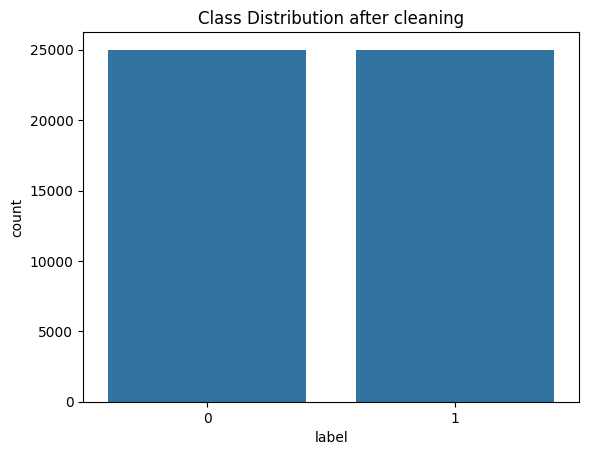

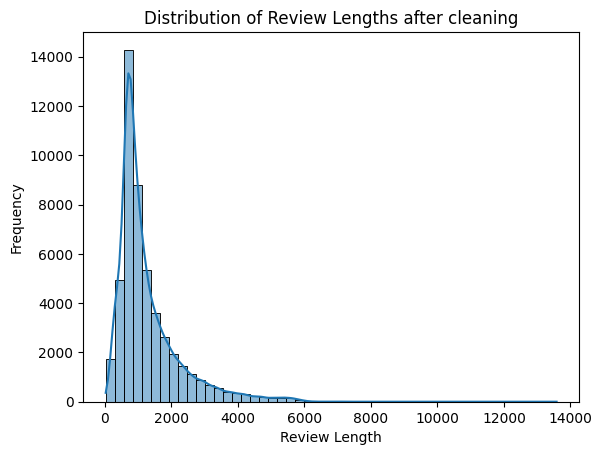

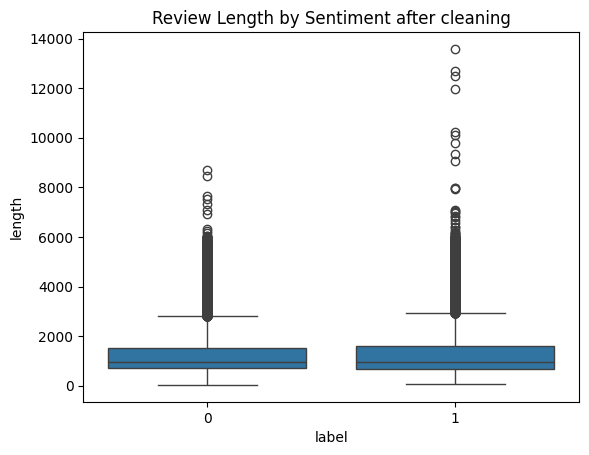

In [4]:
import re

df["review"].iloc[0]
def clean_text(text):
    text = re.sub(r"<.*?>", "", text)        # remove HTML
    text = text.lower()                     # lowercase
    text = re.sub(r"\s+", " ", text)        # remove extra spaces
    return text.strip()

df["clean_review"] = df["review"].apply(clean_text)
df["clean_review"].iloc[0]

sns.countplot(x="label", data=df)
plt.title("Class Distribution after cleaning")
plt.savefig("../saved_model/class_distribution_after-cleaning.png", dpi=100, bbox_inches='tight')
plt.show()

df["length"] = df["clean_review"].apply(len)
sns.histplot(df["length"], bins=50, kde=True)
plt.title("Distribution of Review Lengths after cleaning")
plt.xlabel("Review Length")
plt.ylabel("Frequency")
plt.savefig("../saved_model/review_length_distribution_after_cleaning.png", dpi=100, bbox_inches='tight')
plt.show()

sns.boxplot(x="label", y="length", data=df)
plt.title("Review Length by Sentiment after cleaning")
plt.savefig("../saved_model/boxplot_review_length_after_cleaning.png", dpi=100, bbox_inches='tight')
plt.show()



In [5]:
# Word Frequency Exploration
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words="english", max_features=20)
X = vectorizer.fit_transform(df["clean_review"])
print(vectorizer.get_feature_names_out())
print(X.toarray())

['bad' 'character' 'characters' 'don' 'film' 'films' 'good' 'great' 'just'
 'like' 'make' 'movie' 'movies' 'people' 'really' 'story' 'think' 'time'
 'watch' 'way']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 1 ... 1 0 1]
 ...
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 1 ... 0 1 1]]


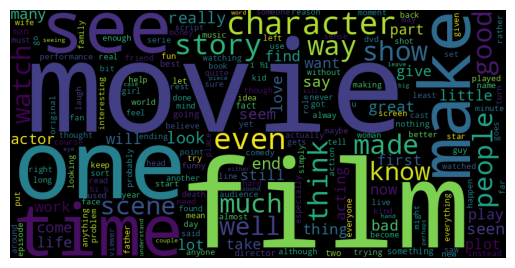

In [6]:
# Word Cloud
from wordcloud import WordCloud

text = " ".join(df["clean_review"])
wordcloud = WordCloud(width=800, height=400).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


In [7]:
df.isnull().sum()
df.duplicated().sum()
df["clean_review"]

0        one of the other reviewers has mentioned that ...
1        a wonderful little production. the filming tec...
2        i thought this was a wonderful way to spend ti...
3        basically there's a family where a little boy ...
4        petter mattei's "love in the time of money" is...
                               ...                        
49995    i thought this movie did a down right good job...
49996    bad plot, bad dialogue, bad acting, idiotic di...
49997    i am a catholic taught in parochial elementary...
49998    i'm going to have to disagree with the previou...
49999    no one expects the star trek movies to be high...
Name: clean_review, Length: 50000, dtype: object